In [315]:
include("SchwarzChristoffel.jl")

SchwarzChristoffel

In [317]:
p = SchwarzChristoffel.Polygon([-1.0,1.0,0.5,-1.0,-1.0],[-1.0,-1.0,1.0,1.0,1.0])

Polygon with 5 vertices at Complex{Float64}[-1.0-1.0im, 1.0-1.0im, 0.5+1.0im, -1.0+1.0im, -1.0+1.0im] 
             interior angles/π = [-0.5, -0.578, -0.422, 0.0, 0.0]


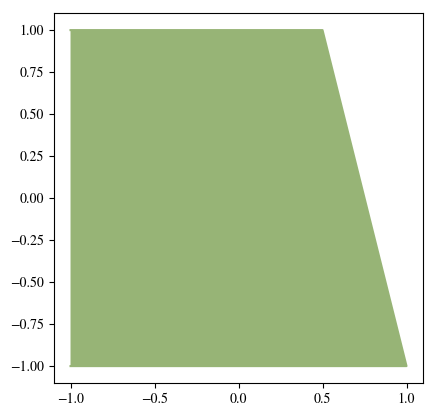

(-1.1, 1.1, -1.1, 1.1)

In [158]:
SchwarzChristoffel.Polygons.plot(p)

In [137]:
SchwarzChristoffel.Polygons.angle(p.vert)

4-element Array{Float64,1}:
 NaN  
   1.0
 NaN  
 NaN  

In [159]:
SchwarzChristoffel.Polygons.isinf(p)

false

In [288]:
z = -1+im*0.2
scale = mean(abs.(diff(circshift(p.vert,-1))))

w = p.vert/scale
z = z/scale

-0.5394176951966886 + 0.10788353903933773im

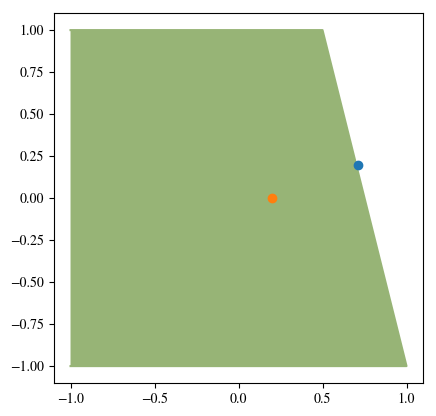

1×2 BitArray{2}:
 false  true

In [319]:
z = [0.71+im*0.2 0.2+im*0]
SchwarzChristoffel.Polygons.plot(p)
PyPlot.plot(real.(z),imag.(z),marker="o")
SchwarzChristoffel.Polygons.isinpoly.(z,p,1e-5)

In [265]:
d = w .- z
d[abs.(d) .< eps()] .= eps()
ang = angle.(circshift(d,-1)./d) / pi

4-element Array{Float64,1}:
  0.327979
  0.327979
  0.344042
 -1.0     

In [266]:
tangents = sign.(circshift(w,-1)-w)
for p = find( tangents .== 0 )
    v = [w[p+1:end];w]
    g = find(v.!=w[p])
    tangents[p] = sign(v[g[1]]-w[p])
end
#     v = [w(p+1:n);w(1:n)];
#     g = find(v ~= w(p));
#     tangents(p) = sign(v(g(1)) - w(p));
#   end

In [267]:
tol = eps()
onbdy = abs.(imag.(d./tangents)) .< 10*tol
onvtx = abs.(d) .< tol
onbdy = onbdy .& ( (abs.(ang) .> 0.9) .| onvtx .| circshift(onvtx,-1) )

4-element BitArray{1}:
 false
 false
 false
  true

In [277]:
interior = ~any(onbdy);
if interior
     index = round(sum(ang)/2)
else
    S = sum(ang[.~onbdy])
    b = beta[onvtx]
    augment = sum(onbdy) - sum(onvtx) - sum(b)

    index = round(augment*sign(S) + S)/2
end
index==1

true

In [105]:
w = copy(p.vert)
dw = diff( [w[end];w] )
dwshift = circshift(dw,-1)
beta = fill(NaN,length(w))
beta[mask] = angle.( dw[mask].*conj.(dwshift[mask]) )/π

1-element Array{Float64,1}:
 -0.577979

In [272]:
onbdy

4-element BitArray{1}:
 false
 false
 false
  true

In [111]:
beta[mods] = ones(beta[mods])

0-element Array{Float64,1}